V3: This notebook will have different models to answer different questions

1. What is the zip code with the higher house prices? 
* This model will have the testing data separated from training data


## Final Project Submission

Please fill out:
* Student name: Francis Morales
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Pablo Crespo
* Blog post URL:


In [1]:
#Make notebook wider
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

# 1. Inspecting, Cleaning and Preparing the Dataset

### 1.1 Use the dataframe.info(), dataframe.describe(), dataframe.isna() methods and print unique values to get an inital sense of the data. Remove duplicate data.

* ['waterfront', 'view', 'yr_renovated'] --> missing values, need to inspect further
* ['date', 'sqft_basement'] --> are saved as object, might have to convert to a different value_type
* ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'] --> Might be able to convert those variables to categories
* 177 rows with duplicate data were identified and removed from dataset.

In [75]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('kc_house_data.csv')

In [76]:
#Check for duplicated data
duplicates = df[df.duplicated(subset='id')]
print(len(duplicates))

177


In [77]:
df.drop_duplicates(subset='id', keep='first', inplace=True)
#Check the new number of rows
df['id'].count()

21420

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#Check the number of NaNs in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Examine the unique values in each column to look for placeholders or unlikely data
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n')

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
2592400250    0.000047
6772200055    0.000047
9808700025    0.000047
2595650170    0.000047
2423059067    0.000047
Name: id, dtype: float64 

date 
 6/23/2014     0.006629
6/26/2014     0.006116
6/25/2014     0.006116
7/8/2014      0.005929
4/27/2015     0.005882
3/25/2015     0.005696
7/9/2014      0.005649
4/14/2015     0.005602
6/24/2014     0.005556
10/28/2014    0.005462
Name: date, dtype: float64 

price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
325000.0    0.006863
400000.0    0.006769
375000.0    0.006443
525000.0    0.006116
300000.0    0.006116
Name: price, dtype: float64 

bedrooms 
 3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
Name: bedrooms, dtype: float64 

bathrooms 
 2.50    0.249860
1

### 1.2 Further inspect the data looking for NaNs and placeholder values. Apply data cleaning procedures described in notes below. Convert variables to appropriate data types.

* ['waterfront']: median = 0 // 99% of the houses with data have ['waterfront'] = 0; therefore, for the NaNs in this variable, I will be assigning ['waterfront'] = 0
* ['view']: median = 0 // 90% of the houses with data have ['view']= 0; therefore, I will be assigning ['view'] = 0 to the NaNs in this variable.
* ['yr_renovated']: median = 0 // 95.7% of the houses with data have ['yr_renovated'] = 0; therefore, for the NaNs in this variable I will be assigning ['yr_renovated'] = 0
* ['yr_renovated']: will transform this variable into a categorical one where ['yr_renovated']=0 if not renovated and ['yr_renovated']=1 if renovated -- this based on 95% of houses have never been renovated and makes more sense to transform to a category
* ['sqft_basement'] has a placeholder "?" representing 2% of the total values. Will calculate the median value of the houses with data and will replace with the calculated median value.
* Data Type transformation:
        -['date']: apply pandas.to_datetime
        -['waterfront', 'yr_renovated', 'zipcode', 'view', 'condition', 'grade']: change to category

In [78]:
#Handling NaNs
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

#Handling placeholder value in 'sqft_basement'
df2 = df.loc[df['sqft_basement'] != '?'].copy()
df2['sqft_basement'] = pd.to_numeric(df2['sqft_basement'])
median1 = df2['sqft_basement'].median()
df['sqft_basement'].loc[df['sqft_basement'] == '?'] = median1
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

#Converting values != 0 into 1 for 'yr_renovated'
df['yr_renovated'].loc[df['yr_renovated'] != 0] = 1

#Handling data type in date
df['date'] = pd.to_datetime(df['date'])
df['zipcode'] = df['zipcode'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['yr_renovated'] = df['yr_renovated'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 1.3 Create dummy variables for categorical data

* Categorical variables should be converted into dummy variables before sticking them in the OLS model
* For Modeling purposes, Zipcode will be converted to individual dummies and bins. The appropriate method will be selected based on the Model

In [79]:
#yr_built
bins = [1900, 1952, 1975, 1997, 2015]
bins_yr_built = pd.cut(df['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_unordered()

#Converting variables to category columns using "get_dummies" pandas method (as described in section 1.2)
yr_built_dummies = pd.get_dummies(bins_yr_built, prefix='yr_built')
yr_renovated_dummies = pd.get_dummies(df['yr_renovated'], prefix='yr_renovated')
waterfront_dummies =  pd.get_dummies(df['waterfront'], prefix='waterfr')
view_dummies =  pd.get_dummies(df['view'], prefix='view')
condition_dummies =  pd.get_dummies(df['condition'], prefix='condit')
grade_dummies =  pd.get_dummies(df['grade'], prefix='grade')

#There are 2 options for zipcode: dummie variables for each zipcode and bins
#These will be selected based on the Model
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode')


### 1.4 Remove Outliers

*  Decided to remove outliers from dataset to improve my model

In [54]:
#Formula to remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [55]:
continuous_columns = ['price','sqft_lot', 'sqft_living']
#Remove outliers from continuous variables
for column in continuous_columns:
    df_model = remove_outlier(df_model, column)

### 1.5 Check for multicollinearity in dataset

*  Use a heatmap to see if any variable needs to be removed from dataset to avoid multicollinearity
        -No variables will be removed as all are below the 0.75 threshold

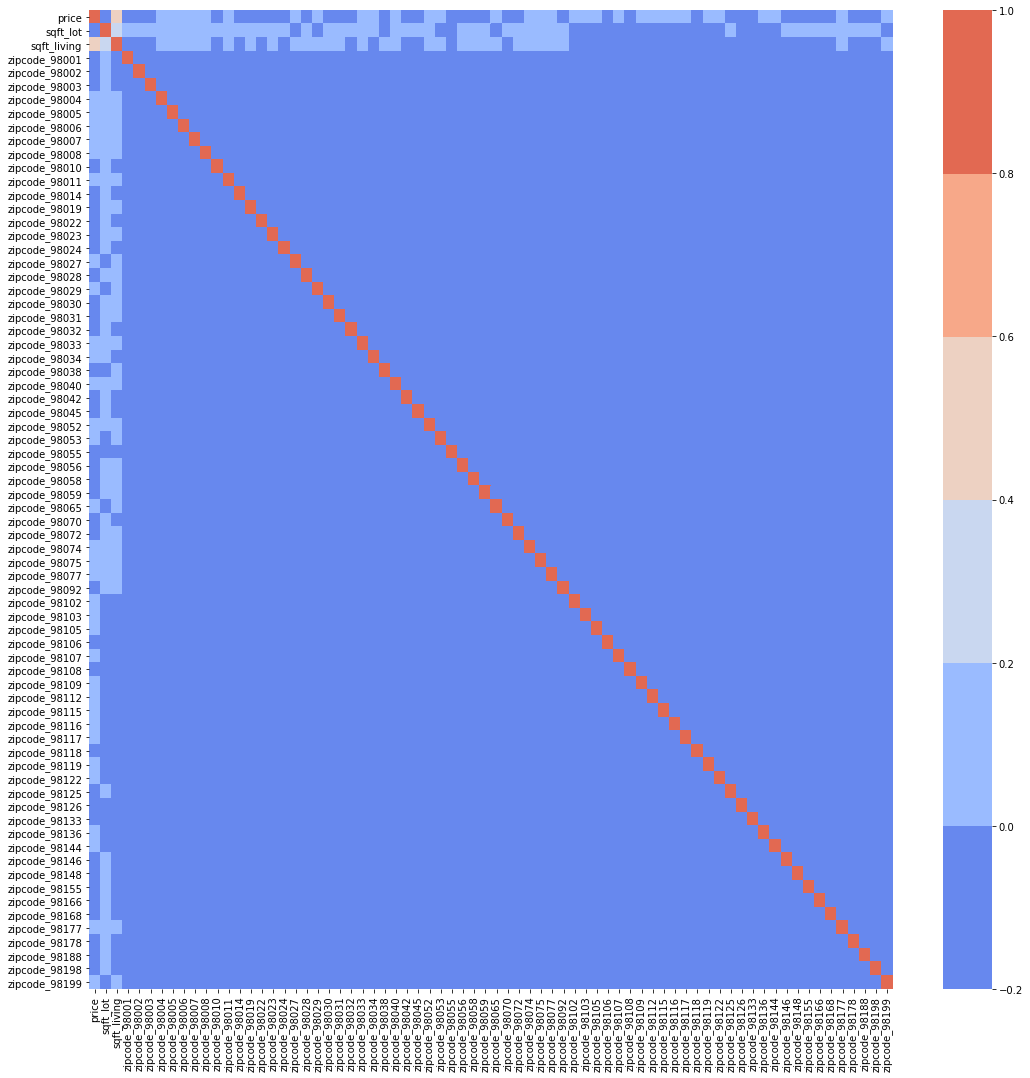

In [56]:
#Heatmap to check multicollinearity
corr = df_model.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

# 2. Model 1: Whats Zip Code Area has the best house appraisal? 
*Using dummy variables for each zipcode

### 2.1 Select variables for Model 1

In [80]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model = df[['price', 'sqft_lot', 'sqft_living']].copy()
df_model = pd.concat([df_model, zipcode_dummies], axis=1) 
df_model = df_model.drop(['zipcode_98039'], axis=1) #dropped the zipcode with lowest data available since we created categories

### 2.2 Train/test split

*  Use Scikit-Learn library:  train_test_split method to train/test split our dataset

In [81]:
y = df_model['price']
x= df_model.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 71) (17136,)
(4284, 71) (4284,)


### 2.3 Generate Model1 and perform feature engineering

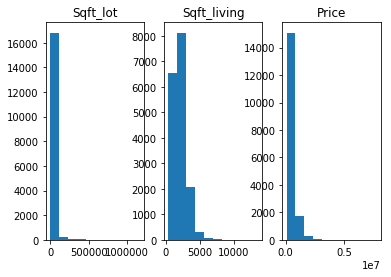

In [97]:
#Plot continuous variables to see normality
ax1 = plt.subplot(1,3,1)
plt.hist(X['sqft_lot'])
ax1.set_title('Sqft_lot')

ax2 = plt.subplot(1,3,2)
plt.hist(X['sqft_living'])
ax2.set_title('Sqft_living')

ax3 = plt.subplot(1,3,3)
plt.hist(y_train)
ax3.set_title('Price')

plt.show()

#### Version 1

Generate version1 of Model1

In [83]:
#Generate version1
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     650.2
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:40:59   Log-Likelihood:            -2.3297e+05
No. Observations:               17136   AIC:                         4.661e+05
Df Residuals:                   17064   BIC:                         4.666e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.207e+06   3.19e+04     37.826      0.000    1.14e+06    1.27e+06
sqft_lot          0.3328      0.040      8.261      0.000       0.254       0.412
sqft_living     255.0218      1.812    140.719      0.000     251.470     258.574
zipcode_98001  -1.42e+06   3.35e+04    -42.437      0.000   -1.49e+06   -1.35e+06
zipcode_98002  -1.39e+06   3.49e+04    -39.798      0.000   -1.46e+06   -1.32e+06
zipcode_98003 -1.412e+06   3.41e+04    -41.428      0.000   -1.48e+06   -1.35e+06
zipcode_98004 -5.817e+05   3.36e+04    -17.335      0.000   -6.47e+05   -5.16e+05
zipcode_98005 -1.089e+06   3.55e+04    -30.683      0.000   -1.16e+06   -1.02e+06
zipcode_98006 -1.093e+06   3.27e+04    -33.468      0.000   -1.16e+06   -1.03e+06
zipcode_98007 -1.154e+06   3.62e+04    -31.907      0.000   -1.23e+06   -1.08e+06
zipcode_98008 -1.118e+06   3.38e+04    -33.034      0.000   -1.18e+06   -1.05e+06
zipcode_98010 -1.344e+06   3.85e+04    -34.919      0.000   -1.42e+06   -1.27e+06
zipcode_98011 -1.294e+06   3.51e+04    -36.879      0.000   -1.36e+06   -1.23e+06
zipcode_98014 -1.327e+06   3.71e+04    -35.756      0.000    -1.4e+06   -1.25e+06
zipcode_98019 -1.353e+06   3.51e+04    -38.581      0.000   -1.42e+06   -1.28e+06
zipcode_98022 -1.384e+06   3.45e+04    -40.067      0.000   -1.45e+06   -1.32e+06
zipcode_98023 -1.439e+06   3.28e+04    -43.906      0.000    -1.5e+06   -1.37e+06
zipcode_98024 -1.266e+06   3.96e+04    -31.978      0.000   -1.34e+06   -1.19e+06
zipcode_98027 -1.243e+06   3.32e+04    -37.418      0.000   -1.31e+06   -1.18e+06
zipcode_98028 -1.285e+06   3.38e+04    -37.989      0.000   -1.35e+06   -1.22e+06
zipcode_98029 -1.179e+06   3.36e+04    -35.110      0.000   -1.24e+06   -1.11e+06
zipcode_98030 -1.413e+06   3.42e+04    -41.310      0.000   -1.48e+06   -1.35e+06
zipcode_98031 -1.404e+06   3.41e+04    -41.171      0.000   -1.47e+06   -1.34e+06
zipcode_98032 -1.403e+06   3.68e+04    -38.136      0.000   -1.47e+06   -1.33e+06
zipcode_98033 -1.007e+06   3.29e+04    -30.560      0.000   -1.07e+06   -9.42e+05
zipcode_98034 -1.198e+06   3.27e+04    -36.628      0.000   -1.26e+06   -1.13e+06
zipcode_98038 -1.392e+06   3.26e+04    -42.696      0.000   -1.46e+06   -1.33e+06
zipcode_98040 -8.179e+05   3.37e+04    -24.268      0.000   -8.84e+05   -7.52e+05
zipcode_98042 -1.409e+06   3.27e+04    -43.039      0.000   -1.47e+06   -1.34e+06
zipcode_98045 -1.313e+06   3.46e+04    -37.962      0.000   -1.38e+06   -1.24e+06
zipcode_98052  -1.17e+06   3.25e+04    -35.970      0.000   -1.23e+06   -1.11e+06
zipcode_98053 -1.213e+06   3.31e+04    -36.615      0.000   -1.28e+06   -1.15e+06
zipcode_98055 -1.363e+06   3.42e+04    -39.868      0.000   -1.43e+06    -1.3e+06
zipcode_98056 -1.299e+06   3.32e+04    -39.152      0.000   -1.36e+06   -1.23e+06
zipcode_98058 -1.382e+06   3.29e+04    -41.971   

Plot residuals of version1 to see if they follow a normal distribution

In [98]:
version1_resid = linreg.resid

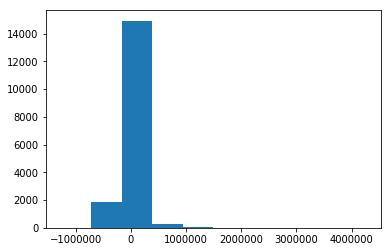

In [101]:
#Histogram of residuals
plt.hist(version1_resid)
plt.show()

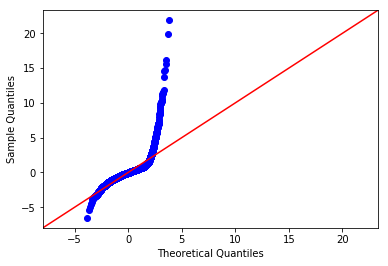

In [104]:
#QQ Plot of residuals
sm.graphics.qqplot(version1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Version 2

Will transform variables to see if residuals normalize

In [105]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

Check multicollinearity after normalization: no multicollinearity found between independent variables

In [136]:
X.corr() > 0.75

,const,sqft_lot,sqft_living,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
const,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98001,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98002,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98003,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98004,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98005,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98006,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98007,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


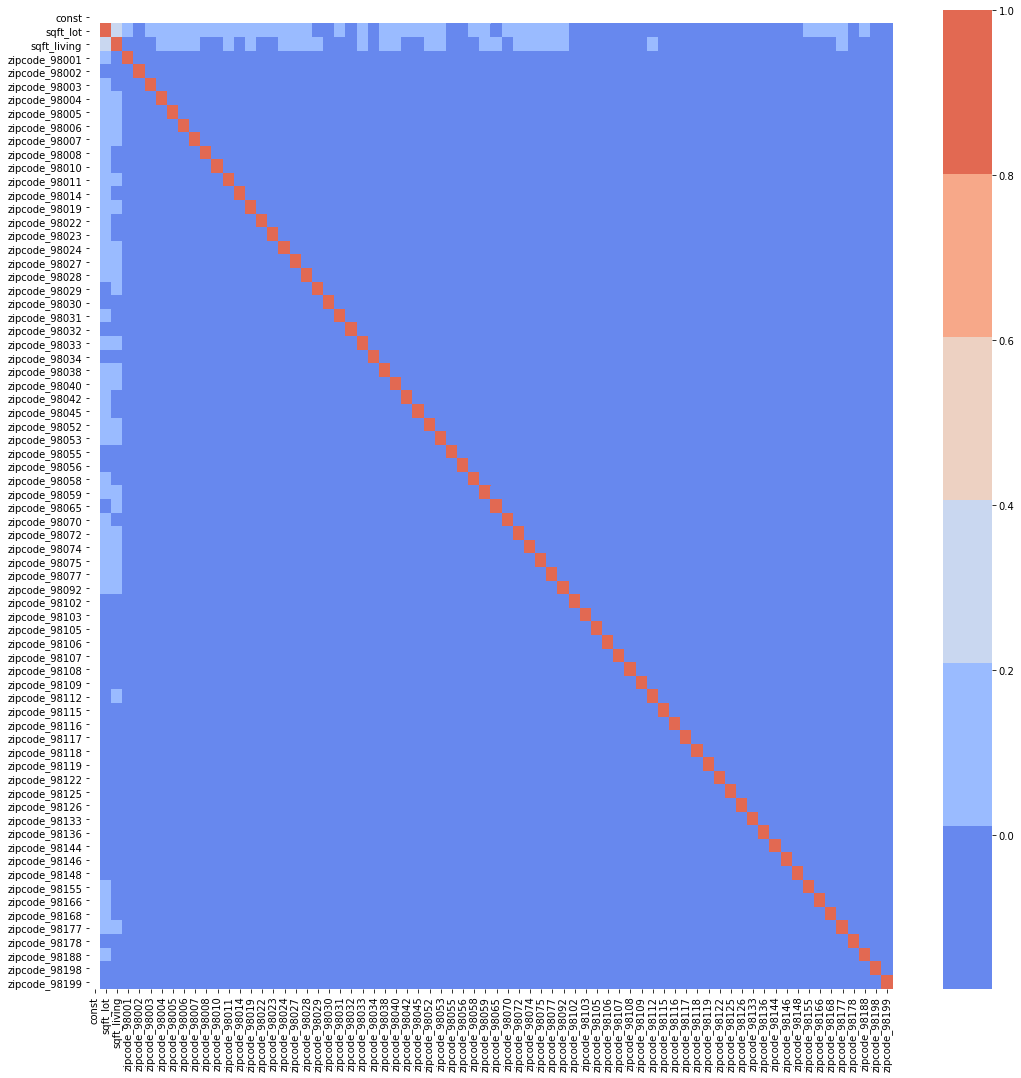

In [134]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

Generate version2 of model

In [137]:
#Generate version2
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1143.
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:51:47   Log-Likelihood:                 1620.1
No. Observations:               17136   AIC:                            -3096.
Df Residuals:                   17064   BIC:                            -2538.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0048      0.052    153.305      0.000       7.902       8.107
sqft_lot          0.0714      0.002     29.427      0.000       0.067       0.076
sqft_living       0.7090      0.005    154.898      0.000       0.700       0.718
zipcode_98001    -1.4878      0.038    -39.324      0.000      -1.562      -1.414
zipcode_98002    -1.5062      0.040    -38.107      0.000      -1.584      -1.429
zipcode_98003    -1.4326      0.039    -37.144      0.000      -1.508      -1.357
zipcode_98004    -0.2506      0.038     -6.592      0.000      -0.325      -0.176
zipcode_98005    -0.6890      0.040    -17.140      0.000      -0.768      -0.610
zipcode_98006    -0.7072      0.037    -19.110      0.000      -0.780      -0.635
zipcode_98007    -0.7863      0.041    -19.203      0.000      -0.867      -0.706
zipcode_98008    -0.7743      0.038    -20.223      0.000      -0.849      -0.699
zipcode_98010    -1.2461      0.044    -28.604      0.000      -1.332      -1.161
zipcode_98011    -1.0179      0.040    -25.630      0.000      -1.096      -0.940
zipcode_98014    -1.2031      0.042    -28.759      0.000      -1.285      -1.121
zipcode_98019    -1.1865      0.040    -29.932      0.000      -1.264      -1.109
zipcode_98022    -1.3876      0.039    -35.606      0.000      -1.464      -1.311
zipcode_98023    -1.4929      0.037    -40.264      0.000      -1.566      -1.420
zipcode_98024    -1.0649      0.045    -23.804      0.000      -1.153      -0.977
zipcode_98027    -0.9203      0.038    -24.488      0.000      -0.994      -0.847
zipcode_98028    -1.0501      0.038    -27.437      0.000      -1.125      -0.975
zipcode_98029    -0.7796      0.038    -20.483      0.000      -0.854      -0.705
zipcode_98030    -1.4228      0.039    -36.775      0.000      -1.499      -1.347
zipcode_98031    -1.4038      0.039    -36.397      0.000      -1.479      -1.328
zipcode_98032    -1.4946      0.042    -35.914      0.000      -1.576      -1.413
zipcode_98033    -0.6119      0.037    -16.407      0.000      -0.685      -0.539
zipcode_98034    -0.9130      0.037    -24.674      0.000      -0.986      -0.840
zipcode_98038    -1.3006      0.037    -35.278      0.000      -1.373      -1.228
zipcode_98040    -0.4336      0.038    -11.353      0.000      -0.508      -0.359
zipcode_98042    -1.4006      0.037    -37.834      0.000      -1.473      -1.328
zipcode_98045    -1.1517      0.039    -29.462      0.000      -1.228      -1.075
zipcode_98052    -0.7904      0.037    -21.464      0.000      -0.863      -0.718
zipcode_98053    -0.8540      0.037    -22.783      0.000      -0.927      -0.781
zipcode_98055    -1.3276      0.039    -34.314      0.000      -1.403      -1.252
zipcode_98056    -1.1231      0.038    -29.921      0.000      -1.197      -1.050
zipcode_98058    -1.2991      0.037    -34.897   

Plot residuals of version2 to see if they follow a normal distribution

In [138]:
version2_resid = linreg.resid

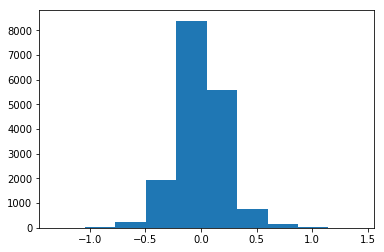

In [139]:
#Histogram of residuals
plt.hist(version2_resid)
plt.show()

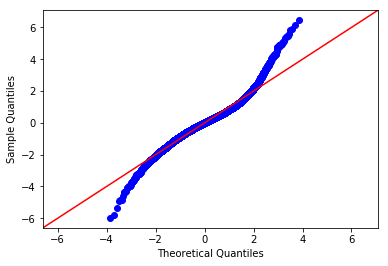

In [140]:
#QQ Plot of residuals
sm.graphics.qqplot(version2_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Version 3

Will do stepwise regression and see if residual distribution gets better

In [141]:
#Model Fit: Stepwise Regression
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [142]:
result = stepwise_selection(X, y_train, verbose = True)
print('resulting features:')
print(result)

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  const                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98023                  with p-value 8.82359e-176
Add  zipcode_98004                  with p-value 8.91797e-177
Add  zipcode_98042                  with p-value 6.0956e-134
Add  zipcode_98001                  with p-value 3.3758e-132
Add  zipcode_98112                  with p-value 1.15068e-119
Add  zipcode_98092                  with p-value 8.06362e-117
Add  zipcode_98038                  with p-value 1.94674e-121
Add  zipcode_98002                  with p-value 3.70429e-106
Add  zipcode_98003                  with p-value 3.61574e-109
Add  zipcode_98058                  with p-value 7.45073e-112
Add  zipcode_98030                  with p-value 3.16647e-119
Add  zipcode_98031                  with p-value 3.19219e-120
Add  zipcode_98168                  with p-value 1.95328e-127
Add  zipcode_98198                  with p-value 1.54776e-111
Add  zipcode_98055          

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Drop zipcode_98006                  with p-value 0.120037
Add  zipcode_98029                  with p-value 3.67528e-06
Drop zipcode_98144                  with p-value 0.993595
Add  zipcode_98008                  with p-value 7.7837e-08
Drop zipcode_98136                  with p-value 0.880202
Add  zipcode_98007                  with p-value 1.81162e-07
Drop zipcode_98005                  with p-value 0.349026
Add  zipcode_98006                  with p-value 4.88074e-05
Add  zipcode_98144                  with p-value 8.64404e-07
Drop zipcode_98116                  with p-value 0.980578
Add  zipcode_98136                  with p-value 1.32848e-07
Drop zipcode_98117                  with p-value 0.268328
Add  zipcode_98005                  with p-value 2.32299e-08
Drop zipcode_98103                  with p-value 0.23708
Add  zipcode_98116                  with p-value 9.2481e-05
Drop zipcode_98122                  with p-value 0.887256
Add  zipcode_98117                  with p-value 6.

In [143]:
feature_list = ['const', 'sqft_living', 'zipcode_98023', 'zipcode_98042', 'zipcode_98001', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98003', 'zipcode_98058', 'zipcode_98030', 'zipcode_98031', 'zipcode_98168', 'zipcode_98198', 'zipcode_98055', 'zipcode_98032', 'zipcode_98178', 'zipcode_98022', 'zipcode_98188', 'zipcode_98056', 'zipcode_98059', 'zipcode_98146', 'zipcode_98106', 'zipcode_98115', 'zipcode_98033', 'zipcode_98109', 'sqft_lot', 'zipcode_98019', 'zipcode_98045', 'zipcode_98148', 'zipcode_98010', 'zipcode_98014', 'zipcode_98166', 'zipcode_98155', 'zipcode_98108', 'zipcode_98065', 'zipcode_98028', 'zipcode_98133', 'zipcode_98118', 'zipcode_98011', 'zipcode_98070', 'zipcode_98072', 'zipcode_98077', 'zipcode_98024', 'zipcode_98034', 'zipcode_98027', 'zipcode_98125', 'zipcode_98053', 'zipcode_98126', 'zipcode_98074', 'zipcode_98075', 'zipcode_98052', 'zipcode_98177', 'zipcode_98029', 'zipcode_98008', 'zipcode_98007', 'zipcode_98006', 'zipcode_98144', 'zipcode_98136', 'zipcode_98005', 'zipcode_98116', 'zipcode_98117', 'zipcode_98103', 'zipcode_98122', 'zipcode_98107', 'zipcode_98199', 'zipcode_98040', 'zipcode_98105', 'zipcode_98119', 'zipcode_98102', 'zipcode_98112', 'zipcode_98004']

In [152]:
X = X[feature_list].copy()

In [153]:
#Generate model #3
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1143.
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:45:16   Log-Likelihood:                 1620.1
No. Observations:               17136   AIC:                            -3096.
Df Residuals:                   17064   BIC:                            -2538.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0048      0.052    153.305      0.000       7.902       8.107
sqft_living       0.7090      0.005    154.898      0.000       0.700       0.718
zipcode_98023    -1.4929      0.037    -40.264      0.000      -1.566      -1.420
zipcode_98042    -1.4006      0.037    -37.834      0.000      -1.473      -1.328
zipcode_98001    -1.4878      0.038    -39.324      0.000      -1.562      -1.414
zipcode_98092    -1.4349      0.038    -38.003      0.000      -1.509      -1.361
zipcode_98038    -1.3006      0.037    -35.278      0.000      -1.373      -1.228
zipcode_98002    -1.5062      0.040    -38.107      0.000      -1.584      -1.429
zipcode_98003    -1.4326      0.039    -37.144      0.000      -1.508      -1.357
zipcode_98058    -1.2991      0.037    -34.897      0.000      -1.372      -1.226
zipcode_98030    -1.4228      0.039    -36.775      0.000      -1.499      -1.347
zipcode_98031    -1.4038      0.039    -36.397      0.000      -1.479      -1.328
zipcode_98168    -1.4441      0.039    -37.276      0.000      -1.520      -1.368
zipcode_98198    -1.3509      0.038    -35.117      0.000      -1.426      -1.276
zipcode_98055    -1.3276      0.039    -34.314      0.000      -1.403      -1.252
zipcode_98032    -1.4946      0.042    -35.914      0.000      -1.576      -1.413
zipcode_98178    -1.3044      0.039    -33.638      0.000      -1.380      -1.228
zipcode_98022    -1.3876      0.039    -35.606      0.000      -1.464      -1.311
zipcode_98188    -1.3965      0.041    -33.697      0.000      -1.478      -1.315
zipcode_98056    -1.1231      0.038    -29.921      0.000      -1.197      -1.050
zipcode_98059    -1.1029      0.037    -29.657      0.000      -1.176      -1.030
zipcode_98146    -1.1890      0.038    -30.915      0.000      -1.264      -1.114
zipcode_98106    -1.1105      0.038    -29.115      0.000      -1.185      -1.036
zipcode_98115    -0.6068      0.037    -16.424      0.000      -0.679      -0.534
zipcode_98033    -0.6119      0.037    -16.407      0.000      -0.685      -0.539
zipcode_98109    -0.3272      0.042     -7.709      0.000      -0.410      -0.244
sqft_lot          0.0714      0.002     29.427      0.000       0.067       0.076
zipcode_98019    -1.1865      0.040    -29.932      0.000      -1.264      -1.109
zipcode_98045    -1.1517      0.039    -29.462      0.000      -1.228      -1.075
zipcode_98148    -1.3475      0.048    -27.842      0.000      -1.442      -1.253
zipcode_98010    -1.2461      0.044    -28.604      0.000      -1.332      -1.161
zipcode_98014    -1.2031      0.042    -28.759      0.000      -1.285      -1.121
zipcode_98166    -1.1024      0.039    -28.480      0.000      -1.178      -1.026
zipcode_98155    -1.0341      0.037    -27.694      0.000      -1.107      -0.961
zipcode_98108    -1.1056      0.040    -27.733   

In [146]:
version3_resid = linreg.resid

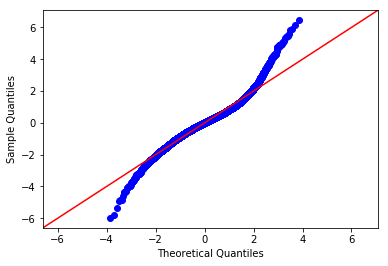

In [147]:
#QQ Plot of residuals
sm.graphics.qqplot(version3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

### 2.4 Test Model

In [155]:
#Transform test variables before testing the model
for feat in ['sqft_lot', 'sqft_living']:
    X_test[feat] = X_test[feat].map(lambda x: np.log(x))

y_test = y_test.map(lambda x: np.log(x))

In [156]:
#linreg variable has the model from version 3
y_hat_train = linreg.predict(X)
y_hat_test = linreg.predict(X_test)

In [158]:
#get the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Compare your predicted values, $\hat y$ with the actual value, $y$ using the Mean Squared Error from both training and test dataset
        
   MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

In [159]:
#Calculate the Mean Squarred Error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.04846231593844203
Test Mean Squarred Error: 118.93458236919162


### 2.5 Conclusion: Model 1

 In general, eventhough R-squared and Adjusted R-squared showed good numbers, the QQ Plots from Model 1 were not very satisfactory (very far from following a normal distribution). Also, the difference of the Mean Squared Error between train data and test data is big, therefore Model 1 is overfitting.
 
 * **Version1:** This model was built on training data without transformation
        -R-squared: 0.730, Adjusted R2: 0.729, Skeweness: 4.544, Kurtosis:60.744, Jarque-Bera: 2439739.283, AIC: 4.661e+05 , BIC: 4.666e+05
        -Residuals do not follow a normal distribution as confirmed by qq plot
        
 * **Version2:** Log transformed my continuous variables to help normalize residual distribution and get a better kurtosis/JB
         -R-squared: 0.826, Adjusted R2: 0.826, Skeweness: 0.267, Kurtosis:5.829, Jarque-Bera:5916.365, AIC: -3096 , BIC:-2538. 
         -Confirmed that there is no multicollinearity between independent variables after transformation
         -QQ plot showed a better normal distribution of residuals compared to version 1 BUT distribution is still not normal
 * **Version3.** Applied Model Fit: Stepwise selection and went from 72 variables to 63 after model fitting
         -R-squared: 0.826, Adjusted R2: 0.826, Skeweness: 0.267, Kurtosis:5.829, Jarque-Bera:5916.365, AIC: -3096.,BIC:-2538. 
         -Same model as version2 resulted after running Stepwise selection
         